### Graphical Causal Models

In [2]:
import graphviz as gr
import networkx as nx

g_cross_sell = gr.Digraph()

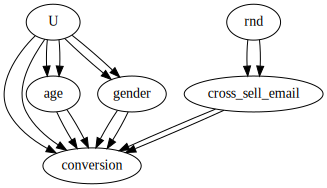

In [4]:
g_cross_sell.edge('U', 'conversion')
g_cross_sell.edge('U', 'age')
g_cross_sell.edge('U', 'gender')

g_cross_sell.edge('rnd', 'cross_sell_email')
g_cross_sell.edge('cross_sell_email', 'conversion')
g_cross_sell.edge('age', 'conversion')
g_cross_sell.edge('gender', 'conversion')

g_cross_sell

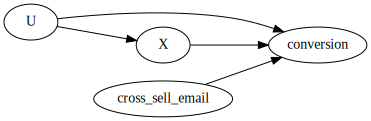

In [5]:
g_cross_sell = gr.Digraph(graph_attr = {'rankdir' : 'LR'})

g_cross_sell.edge('U','conversion')
g_cross_sell.edge('U','X')
g_cross_sell.edge('cross_sell_email', 'conversion')
g_cross_sell.edge('X','conversion')

g_cross_sell

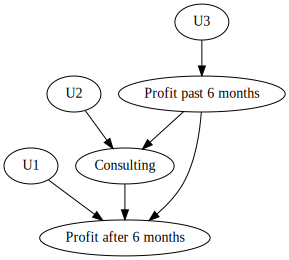

In [11]:
profit_graph = gr.Digraph()

profit_graph.edge('U1','Profit after 6 months')

profit_graph.edge('U2','Consulting')
profit_graph.edge('Consulting', 'Profit after 6 months')

profit_graph.edge('U3', 'Profit past 6 months')
profit_graph.edge('Profit past 6 months', 'Consulting')
profit_graph.edge('Profit past 6 months', 'Profit after 6 months')

profit_graph

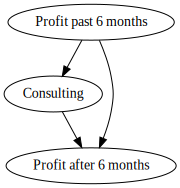

In [12]:
profit_graph = gr.Digraph()


profit_graph.edge('Consulting', 'Profit after 6 months')

profit_graph.edge('Profit past 6 months', 'Consulting')
profit_graph.edge('Profit past 6 months', 'Profit after 6 months')

profit_graph

### Positive Assumption

In [13]:
import pandas as pd

df = pd.DataFrame(
    {
        'profits_prev_6m' : [1, 1, 1, 5, 5, 5],
        'consultancy' : [0, 0, 1, 0, 1, 1],
        'profits_next_6m' : [1, 1.1, 1.2, 5.5, 5.7, 5.7],
    }
)

In [14]:
df

,profits_prev_6m,consultancy,profits_next_6m
0,1,0,1.0
1,1,0,1.1
2,1,1,1.2
3,5,0,5.5
4,5,1,5.7
5,5,1,5.7


In [16]:
df.query('consultancy == 1')['profits_next_6m'].mean()

4.2

In [17]:
df.query('consultancy == 0')['profits_next_6m'].mean()

2.533333333333333

In [18]:
df.query('consultancy == 1')['profits_next_6m'].mean() - df.query('consultancy == 0')['profits_next_6m'].mean()

1.666666666666667

In [19]:
avg_df = df.groupby(['consultancy', 'profits_prev_6m'])['profits_next_6m'].mean()

In [21]:
avg_df.loc[1] - avg_df.loc[0]

profits_prev_6m
1    0.15
5    0.20
Name: profits_next_6m, dtype: float64

### NPS Model

In [25]:
import networkx as nx 

nps_model = nx.DiGraph(
    [
        ('RND','New Feature'),
        # ('New Feature','Customer Satisfaction'),
        ('Customer Satisfaction','NPS'),
        ('Customer Satisfaction','Response'),
        ('New Feature','Response')
    ]
)
not(nx.d_separated(nps_model, {'NPS'}, {'New Feature'}, {'Response'}))

True

In [26]:
data = pd.read_csv('../causal-inference-for-the-brave-and-true/data/customer_features.csv')

In [27]:
data

,customer_id,region,income,age
0,0,30,1025,24
1,1,41,1649,26
2,2,18,2034,33
3,3,20,1859,35
4,4,1,1243,26
...,...,...,...,...
9995,9995,39,4570,30
9996,9996,2,1588,33
9997,9997,29,780,31
9998,9998,44,1832,25
